In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_city = 'raw_data/city_data.csv'
path_ride = 'raw_data/ride_data.csv'
city_data_df = pd.read_csv(path_city)
ride_data_df = pd.read_csv(path_ride)

In [3]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:

ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
pyber_data_df = city_data_df.merge(ride_data_df, on='city')
pyber_data_df.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [6]:
pyber_group = pyber_data_df.groupby('city')
pyber_ride_count = pyber_group.count()
pyber_fare_avg = pyber_group.mean()

In [7]:
pyber_ride_count = pyber_ride_count.loc[:,'ride_id']
pyber_ride_count = pyber_ride_count.to_frame()
pyber_ride_count.rename(columns={'ride_id': 'ride_count'}, inplace=True)

index = pyber_ride_count.index
pyber_ride_count.reset_index(inplace=True)

In [8]:
pyber_fare_avg = pyber_fare_avg.loc[:,'fare']
pyber_fare_avg = pyber_fare_avg.to_frame()
pyber_fare_avg.rename(columns={'fare': 'average_fare'}, inplace=True)
pyber_fare_avg.reset_index(inplace=True)


In [9]:
pyber_data_df = pyber_data_df.merge(pyber_ride_count, on='city').merge(pyber_fare_avg, on='city')
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id,ride_count,average_fare
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794,28,22.373214
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494,28,22.373214
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416,28,22.373214
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413,28,22.373214
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850,28,22.373214



count = pyber_ride_count.iloc[:,0]
avg = pyber_fare_avg.iloc[:,0]
ax1 = plt.scatter(x=count, y=avg, s=1*pyber_data_df['driver_count']**1.5,color=city_type.apply(lambda x: 'Gold' if x=='Rural' else 'lightskyblue' if x=='Suburban' else 'lightcoral'), alpha=.5, edgecolor='k', linewidth=1)
ax1.set_xlabel('Number of Rides (per city)')
ax1.set_ylabel('Average Fares ($)')
ax1.text(35,35,'size is number of drivers')
ax1.set_frame_on(False)
ax1.show()



color = city_type.apply(lambda x: 'Gold' if x=='Rural' else 'lightskyblue' if x=='Suburban' else 'lightcoral')
color.

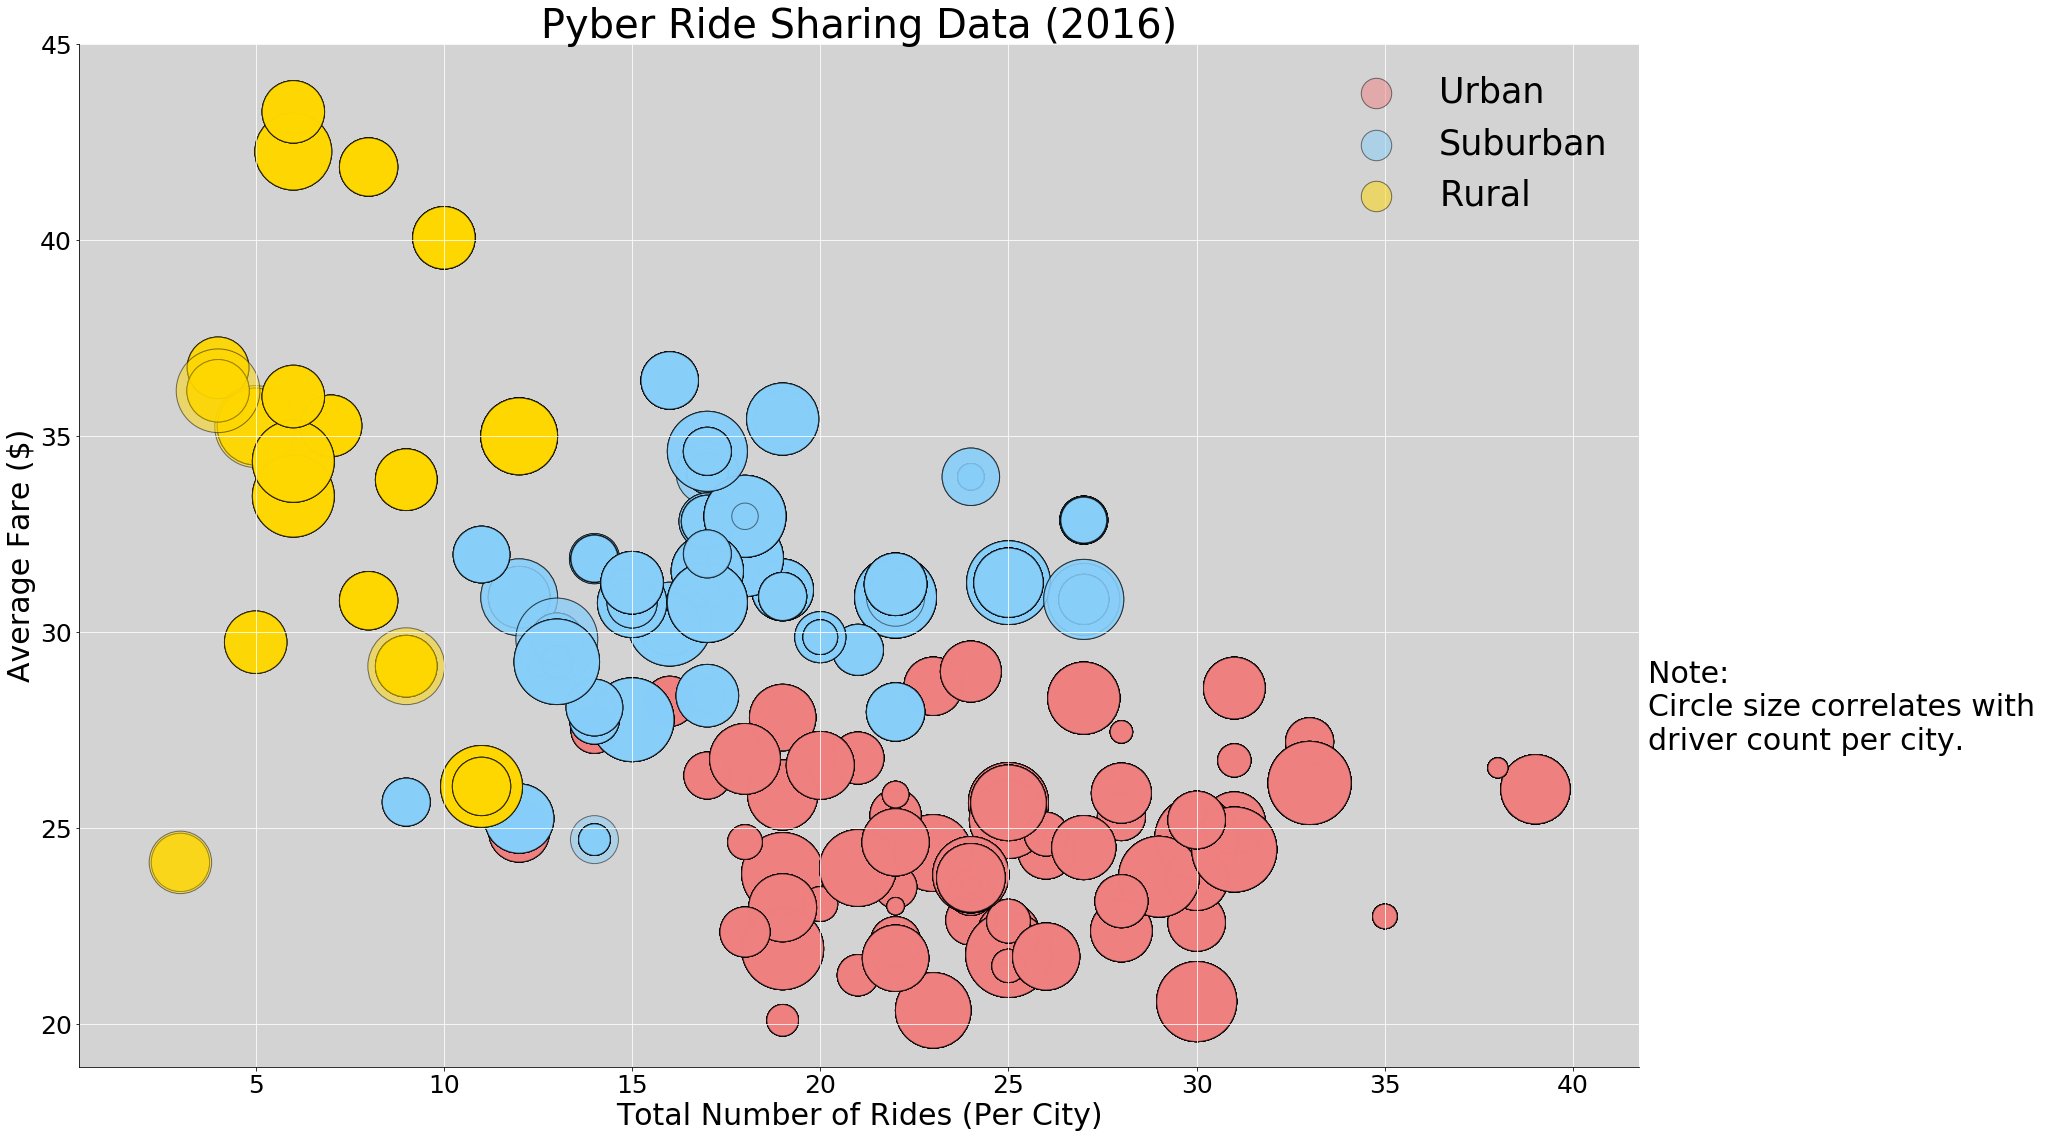

In [20]:
g = sns.lmplot(x='ride_count', y='average_fare', data=pyber_data_df,palette={'Rural': 'gold', 'Suburban': 'lightskyblue', 'Urban': 'lightcoral'}, hue='type', size=15, aspect=1.5, legend=False, fit_reg=False, scatter_kws={'s': pyber_data_df['driver_count']*100, 'alpha': .5, 'edgecolor': 'k', 'linewidth': 1})
ax = g.ax
ax.text(42,27,'Note: \nCircle size correlates with \ndriver count per city.').set_fontsize(30)
ax.legend(loc='upper right', fontsize=35, markerscale=.5, frameon=False)
ax.set_title('Pyber Ride Sharing Data (2016)').set_fontsize(40)
ax.grid(color='white')
ax.set_xlabel('Total Number of Rides (Per City)').set_fontsize(30)
ax.set_ylabel('Average Fare ($)').set_fontsize(30)
ax.tick_params(which='major', labelsize=25)
ax.set_facecolor("lightgrey")
g.savefig('bubble.png')

In [11]:
pyber_data_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374
city,Richardfort,Richardfort,Richardfort,Richardfort,Richardfort,Richardfort,Richardfort,Richardfort,Richardfort,Richardfort,...,Jessicaport,Jessicaport,Jessicaport,Jessicaport,Jessicaport,Jessicaport,South Saramouth,South Saramouth,South Saramouth,South Saramouth
driver_count,38,38,38,38,38,38,38,38,38,38,...,1,1,1,1,1,1,7,7,7,7
type,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,Urban,...,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural
date,2018-02-24 08:40:38,2018-02-13 12:46:07,2018-02-16 13:52:19,2018-02-01 20:18:28,2018-04-17 02:26:37,2018-04-21 03:44:04,2018-02-03 00:14:26,2018-02-08 15:50:12,2018-04-03 15:07:34,2018-02-19 14:09:20,...,2018-01-01 09:45:36,2018-01-14 07:09:17,2018-04-13 16:08:11,2018-03-18 16:59:40,2018-05-01 08:14:47,2018-01-31 17:57:25,2018-02-20 16:32:36,2018-01-28 15:55:33,2018-03-27 21:07:16,2018-04-12 18:11:50
fare,13.93,14,17.92,10.26,23,9.54,29.04,16.55,40.77,27.11,...,43.69,18.05,39.89,33.72,22.44,58.29,44.29,31.25,11.87,57.23
ride_id,5628545007794,910050116494,820639054416,9554935945413,720020655850,3698147103219,4982665519010,2270463070874,9496210735824,8690324801449,...,2424875833354,5405362355006,6511242590852,3046889917159,3725278487786,623154556195,3622365199969,7118046558393,170351888128,5081198789583
ride_count,28,28,28,28,28,28,28,28,28,28,...,6,6,6,6,6,6,4,4,4,4
average_fare,22.3732,22.3732,22.3732,22.3732,22.3732,22.3732,22.3732,22.3732,22.3732,22.3732,...,36.0133,36.0133,36.0133,36.0133,36.0133,36.0133,36.16,36.16,36.16,36.16
